# **Analysis of Airbnb data by Wanja**

# 1. Data wrangling

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [ ]:
# read excel file from Google Drive (must be visible for everyone and the part of the link after the last slash has to be replaced with export/format=xlsx)
excel = pd.ExcelFile('https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export/format=xlsx')

In [ ]:
# check which functions you can use on the file
dir(excel)

['CalamineReader',
 'ODFReader',
 'OpenpyxlReader',
 'PyxlsbReader',
 'XlrdReader',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_engines',
 '_io',
 '_reader',
 'book',
 'close',
 'engine',
 'io',
 'parse',
 'sheet_names',
 'storage_options']

In [ ]:
# display sheet names within the excel file
excel.sheet_names

['amsterdam_weekdays',
 'amsterdam_weekends',
 'athens_weekdays',
 'athens_weekends',
 'berlin_weekends',
 'berlin_weekdays',
 'barcelona_weekdays',
 'barcelona_weekends',
 'budapest_weekdays',
 'budapest_weekends',
 'lisbon_weekdays',
 'lisbon_weekends',
 'london_weekdays',
 'london_weekends',
 'paris_weekdays',
 'paris_weekends',
 'rome_weekdays',
 'rome_weekends',
 'vienna_weekdays',
 'vienna_weekends']

In [ ]:
# check if the import worked by accessing one sheet
am = excel.parse('amsterdam_weekdays')
am.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [ ]:
# concatenate all sheets and add a column with the sheet names
df = pd.concat([excel.parse(sheet_name).assign(sheet_name=sheet_name) for sheet_name in excel.sheet_names])
df.reset_index(inplace=True)

# check if the number of rows is correct
print(df.shape)

(51707, 21)

In [ ]:
# check columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       51707 non-null  int64  
 1   Unnamed: 0                  51707 non-null  int64  
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  int64  
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  int64  
 11  guest_satisfaction_overall  51707 non-null  int64  
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

In [ ]:
# display head of the dataframe
df.head()

,index,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name
0,0,0,194.033698,Private room,False,True,2,False,1,0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays
1,1,1,344.245776,Private room,False,True,4,False,0,0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays
2,2,2,264.101422,Private room,False,True,2,False,0,1,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays
3,3,3,433.529398,Private room,False,True,4,False,0,1,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays
4,4,4,485.552926,Private room,False,True,2,True,0,0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays


In [ ]:
# create columns for city and weekday
df[['city', 'weekday']] = df['sheet_name'].str.split('_', expand=True)
df.head()

,index,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,city,weekday
0,0,0,194.033698,Private room,False,True,2,False,1,0,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,amsterdam,weekdays
1,1,1,344.245776,Private room,False,True,4,False,0,0,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,amsterdam,weekdays
2,2,2,264.101422,Private room,False,True,2,False,0,1,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,amsterdam,weekdays
3,3,3,433.529398,Private room,False,True,4,False,0,1,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,amsterdam,weekdays
4,4,4,485.552926,Private room,False,True,2,True,0,0,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,amsterdam,weekdays


In [ ]:
# get all cities
df['city'].unique()

array(['amsterdam', 'athens', 'berlin', 'barcelona', 'budapest', 'lisbon',
       'london', 'paris', 'rome', 'vienna'], dtype=object)

In [ ]:
# create a country column based on the cities
df['country'] = df['city'].map({'amsterdam': 'Netherlands', 'athens': 'Greece', 'berlin': 'Germany', 'barcelona': 'Spain', 'budapest': 'Hungary', 'lisbon': 'Portugal', 'london': 'United Kingdom', 'paris': 'France', 'rome': 'Italy', 'vienna': 'Austria'})
df.head()

,index,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,city,weekday,country
0,0,0,194.033698,Private room,False,True,2,False,1,0,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,amsterdam,weekdays,Netherlands
1,1,1,344.245776,Private room,False,True,4,False,0,0,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,amsterdam,weekdays,Netherlands
2,2,2,264.101422,Private room,False,True,2,False,0,1,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,amsterdam,weekdays,Netherlands
3,3,3,433.529398,Private room,False,True,4,False,0,1,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,amsterdam,weekdays,Netherlands
4,4,4,485.552926,Private room,False,True,2,True,0,0,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,amsterdam,weekdays,Netherlands


In [ ]:
# get weekday values
df['weekday'].unique()

array(['weekdays', 'weekends'], dtype=object)

In [ ]:
# convert weekday into boolean values
df['weekday'] = df['weekday'].map({'weekdays': True, 'weekends': False})
print(df['weekday'].dtype)
df.head()

bool


,index,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,city,weekday,country
0,0,0,194.033698,Private room,False,True,2,False,1,0,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,amsterdam,True,Netherlands
1,1,1,344.245776,Private room,False,True,4,False,0,0,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,amsterdam,True,Netherlands
2,2,2,264.101422,Private room,False,True,2,False,0,1,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,amsterdam,True,Netherlands
3,3,3,433.529398,Private room,False,True,4,False,0,1,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,amsterdam,True,Netherlands
4,4,4,485.552926,Private room,False,True,2,True,0,0,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,amsterdam,True,Netherlands


In [ ]:
# rename realSum into Price
df.rename(columns={'realSum':'Price'}, inplace=True)
df.columns

Index(['index', 'Unnamed: 0', 'Price', 'room_type', 'room_shared',
       'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'sheet_name', 'city', 'weekday',
       'country'],
      dtype='object')

In [ ]:
# remove the first column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns

Index(['index', 'Price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'sheet_name', 'city', 'weekday',
       'country'],
      dtype='object')

In [ ]:
# check if room private and room shared are always the opposite of each other
df.loc[((df['room_private'] == True) & (df['room_shared'] == True)) | ((df['room_private'] == False) & (df['room_shared'] == False))]


,index,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,city,weekday,country
7,7,2771.307384,Entire home/apt,False,False,4,True,0,0,10,...,208.808109,11.056528,272.313823,18.975219,4.88467,52.38749,amsterdam_weekdays,amsterdam,True,Netherlands
8,8,1001.804420,Entire home/apt,False,False,4,False,0,0,9,...,106.226456,5.624761,133.876202,9.328686,4.86459,52.40175,amsterdam_weekdays,amsterdam,True,Netherlands
10,10,909.474375,Entire home/apt,False,False,2,False,0,0,10,...,409.858124,21.702260,555.114276,38.681161,4.87956,52.36953,amsterdam_weekdays,amsterdam,True,Netherlands
12,12,675.602840,Entire home/apt,False,False,4,False,0,0,8,...,214.923342,11.380334,269.624904,18.787851,4.88934,52.34697,amsterdam_weekdays,amsterdam,True,Netherlands
13,13,552.808567,Entire home/apt,False,False,2,True,0,0,10,...,325.255952,17.222519,390.912052,27.239314,4.87417,52.37509,amsterdam_weekdays,amsterdam,True,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51699,1791,718.275951,Entire home/apt,False,False,6,False,0,1,10,...,212.077619,15.187600,420.030138,10.151966,16.37953,48.21177,vienna_weekends,vienna,False,Austria
51701,1793,750.765491,Entire home/apt,False,False,6,False,0,1,10,...,257.494817,18.440080,548.973296,13.268473,16.37825,48.21001,vienna_weekends,vienna,False,Austria
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,...,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna_weekends,vienna,False,Austria
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,...,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna_weekends,vienna,False,Austria


In [ ]:
# create one column based on the dummy variables room_private and room_shared
df['room'] = df.apply(lambda x: 'private' if x['room_private'] else ('shared' if x['room_shared'] else None), axis=1)
df['room'].unique()

array(['private', None, 'shared'], dtype=object)

# 2. Data inspection

In [ ]:
# display first 5 rows
df.head()

,index,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,city,weekday,country,room
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam_weekdays,amsterdam,True,Netherlands,private
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam_weekdays,amsterdam,True,Netherlands,private
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam_weekdays,amsterdam,True,Netherlands,private
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam_weekdays,amsterdam,True,Netherlands,private
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam_weekdays,amsterdam,True,Netherlands,private


In [ ]:
# display last 5 rows
df.tail()

,index,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,attr_index_norm,rest_index,rest_index_norm,lng,lat,sheet_name,city,weekday,country,room
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,...,15.712158,438.756874,10.604584,16.37940,48.21136,vienna_weekends,vienna,False,Austria,None
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,...,14.678608,342.182813,8.270427,16.38070,48.20296,vienna_weekends,vienna,False,Austria,None
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,...,12.107921,282.296424,6.822996,16.38568,48.20460,vienna_weekends,vienna,False,Austria,None
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,...,7.822803,158.563398,3.832416,16.34100,48.19200,vienna_weekends,vienna,False,Austria,private
51706,1798,133.230489,Private room,False,True,4,True,1,0,10,...,10.774264,225.247293,5.444140,16.39066,48.20811,vienna_weekends,vienna,False,Austria,private


In [ ]:
# display number of rows and columns
df.shape

(51707, 25)

In [ ]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       51707 non-null  int64  
 1   Price                       51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  int64  
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  int64  
 10  guest_satisfaction_overall  51707 non-null  int64  
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [ ]:
# show summary statistics
df.describe()

,index,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,1620.502388,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,1217.380366,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,0.000000,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,646.000000,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,1334.000000,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,2382.000000,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,5378.000000,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


# 3. Exploratory questions

## 3.1. How many listings are in each city in total and also per type of day?

In [25]:
# count listings per city (ordered by city)
df.groupby('city')['city'].count()

city
amsterdam    2080
athens       5280
barcelona    2833
berlin       2484
budapest     4022
lisbon       5763
london       9993
paris        6688
rome         9027
vienna       3537
Name: city, dtype: int64

In [26]:
# count listings per city - alternative (ordered by amount)
df['city'].value_counts()


city
london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: count, dtype: int64

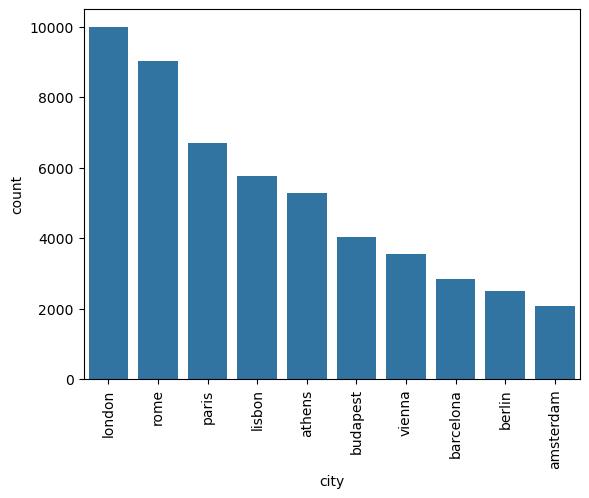

In [27]:
# plot listings per city
sns.countplot(x='city', data=df, order=df['city'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# count listings per type of day
df['weekday'].value_counts()

weekday
False    26207
True     25500
Name: count, dtype: int64

In [30]:
# count listings per city and type of day
df.groupby(['city', 'weekday'])['city'].count()

city       weekday
amsterdam  False       977
           True       1103
athens     False      2627
           True       2653
barcelona  False      1278
           True       1555
berlin     False      1200
           True       1284
budapest   False      1948
           True       2074
lisbon     False      2906
           True       2857
london     False      5379
           True       4614
paris      False      3558
           True       3130
rome       False      4535
           True       4492
vienna     False      1799
           True       1738
Name: city, dtype: int64

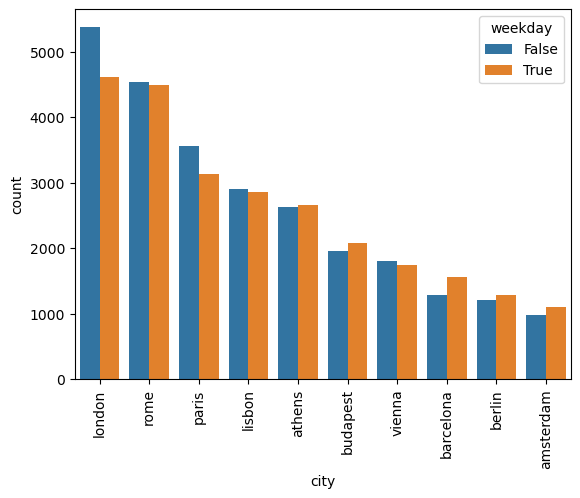

In [31]:
# plot listings per city and weekday
sns.countplot(x='city', hue='weekday', data=df, order=df['city'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

## 3.2. Which city has the biggest proportion of superhosts?

In [32]:
# count superhosts per city
df.groupby('city')['host_is_superhost'].sum().sort_values(ascending=False)

city
rome         2949
athens       2263
london       1573
budapest     1524
lisbon       1233
vienna       1005
paris         941
berlin        639
amsterdam     591
barcelona     514
Name: host_is_superhost, dtype: int64

In [33]:
# calculate proportion of superhosts per city: mean of binary data (0 and 1) = proportion
super_prop = df.groupby('city')['host_is_superhost'].mean().sort_values(ascending=False)
print(super_prop)

city
athens       0.428598
budapest     0.378916
rome         0.326687
vienna       0.284139
amsterdam    0.284135
berlin       0.257246
lisbon       0.213951
barcelona    0.181433
london       0.157410
paris        0.140700
Name: host_is_superhost, dtype: float64


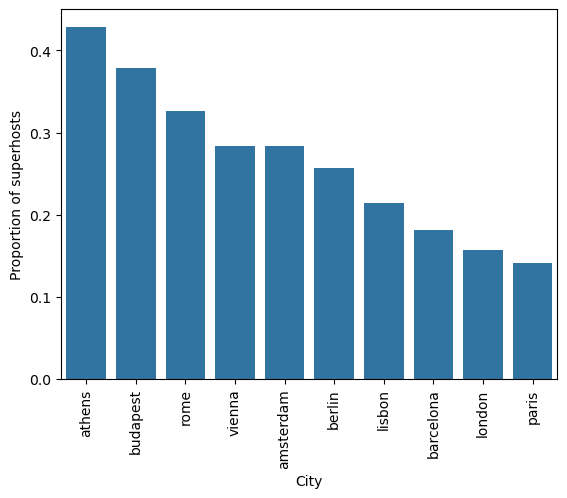

In [34]:
# plot proportion of superhosts per city
sns.barplot(x=super_prop.index, y=super_prop.values)
plt.xticks(rotation=90)
plt.ylabel('Proportion of superhosts')
plt.xlabel('City')
plt.show()

## 3.3. Which cities have listings with more than four rooms?

In [35]:
# search for variable showing the amount of rooms
df.columns

Index(['index', 'Price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'sheet_name', 'city', 'weekday',
       'country', 'room'],
      dtype='object')

In [36]:
# select rows with more than 4 rooms
# count offers with more than 4 rooms in each city
many_rooms = df.loc[df['bedrooms']>4].groupby('city')['bedrooms'].count().sort_values(ascending=False)
print(many_rooms)

city
lisbon       10
london        5
amsterdam     4
barcelona     2
berlin        2
paris         2
rome          1
Name: bedrooms, dtype: int64


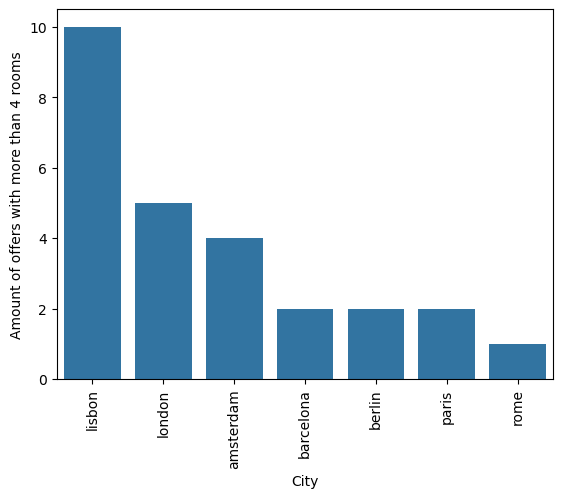

In [37]:
# plot amount of offers with more than 4 rooms for each city
sns.barplot(x=many_rooms.index, y=many_rooms.values)
plt.xticks(rotation=90)
plt.ylabel('Amount of offers with more than 4 rooms')
plt.xlabel('City')
plt.show()

## 3.4. Which city has the most entire home/apt type listings?

In [ ]:
# check how entire homes are spelled in the data
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# get city with most home type listings
df.loc[df['room_type']=='Entire home/apt'].groupby('city')['city'].count().idxmax()

'rome'

In [ ]:
# get city with most home type listings + the amount 
df.loc[df['room_type']=='Entire home/apt'].groupby('city')['city'].count().nlargest(1)

city
rome    5561
Name: city, dtype: int64

## 3.5. Are ratings typically high across listings, or is there a wide variation?

In [ ]:
# search for needed columns
df.columns

Index(['index', 'Price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'sheet_name', 'city', 'weekday',
       'country', 'room'],
      dtype='object')

<Axes: xlabel='cleanliness_rating', ylabel='Count'>

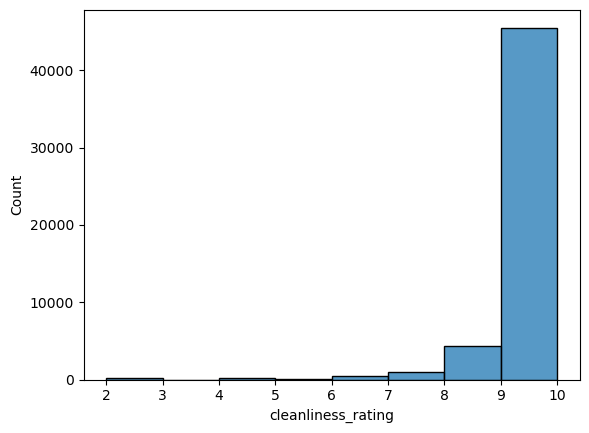

In [ ]:
# plot distribution of cleanliness ratings
sns.histplot(x='cleanliness_rating', data=df, binwidth=1)

<Axes: xlabel='cleanliness_rating'>

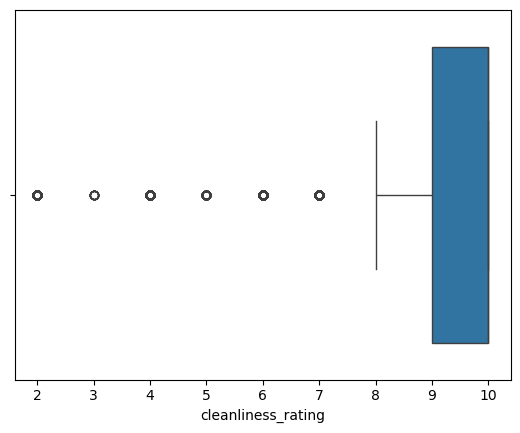

In [ ]:
# plot distribution of cleanliness ratings
sns.boxplot(x='cleanliness_rating', data=df)

Cleanliness ratings are typically high across listings.

<Axes: xlabel='guest_satisfaction_overall', ylabel='Count'>

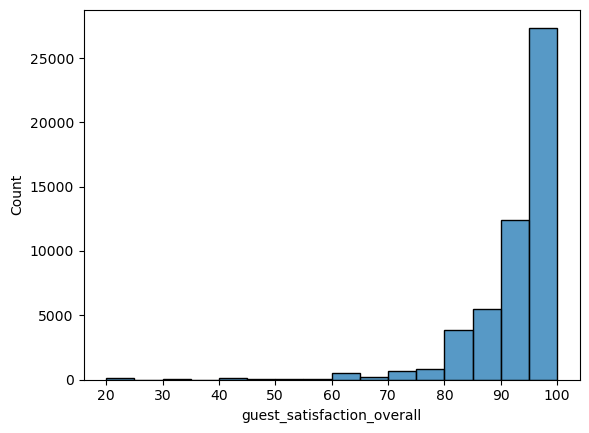

In [ ]:
# plot distribution of guest satisfaction
sns.histplot(x='guest_satisfaction_overall', data=df, binwidth=5)

<Axes: xlabel='guest_satisfaction_overall'>

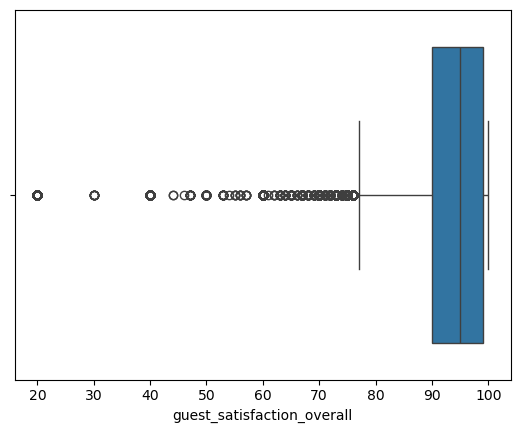

In [ ]:
# plot distribution of guest satisfaction

sns.boxplot(x='guest_satisfaction_overall', data=df)

Guest satisfaction overall is typically high across listings.

Bonus question by Veda: I would be interested which Airbnb offer only has a rating of 20.

In [ ]:
# select Airbnb listings with a guest satisfaction of 20
df.loc[df['guest_satisfaction_overall'] == df['guest_satisfaction_overall'].min(),['guest_satisfaction_overall', 'lat', 'lng']]

,guest_satisfaction_overall,lat,lng
901,20,52.31161,4.95764
1903,20,52.31161,4.95764
1918,20,52.37452,4.87679
2276,20,37.99922,23.73154
2627,20,37.96733,23.71024
...,...,...,...
46864,20,41.90774,12.49817
46872,20,41.90907,12.47915
47152,20,41.91252,12.51517
47461,20,41.90919,12.52280


Many Airbnb listings have a guest satisfaction of 20.

## 3.6. How does person_capacity vary across listings? What is the most common capacity of listings?

<Axes: xlabel='person_capacity', ylabel='Count'>

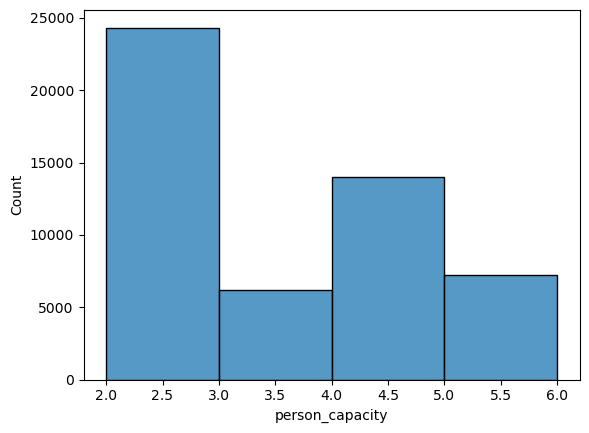

In [ ]:
# plot distribution of person capacity
sns.histplot(x='person_capacity', data = df, binwidth=1)

<Axes: xlabel='person_capacity'>

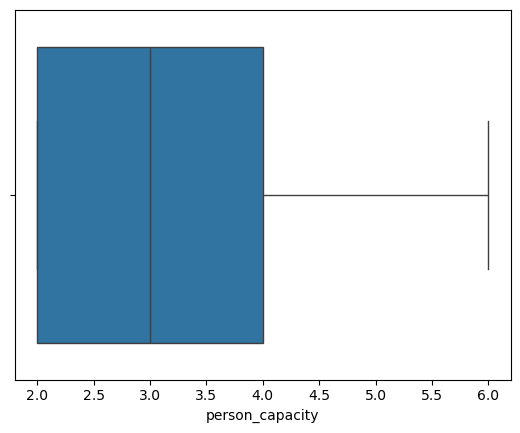

In [ ]:
# plot distribution of person capacity
sns.boxplot(x='person_capacity', data=df)

There are no offers which can accomodate only 1 person or more than 6. A smaller number of persons (2) is more common than higher numbers, but there is also a second spike at 4 persons.

In [ ]:
# get the most common person capacity
df['person_capacity'].mode()

0    2
Name: person_capacity, dtype: int64

The most common person capacity is 2.

## 3.7. Distribution of realSum

Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.

<Axes: xlabel='Price', ylabel='Count'>

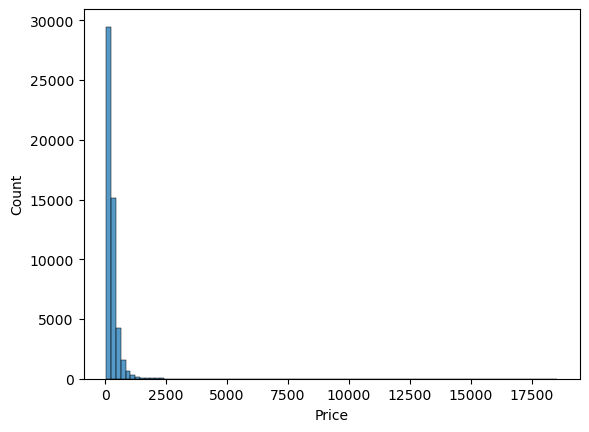

In [ ]:
# plot distribution of price
sns.histplot(x='Price', data=df, binwidth=200)

<Axes: xlabel='Price', ylabel='Count'>

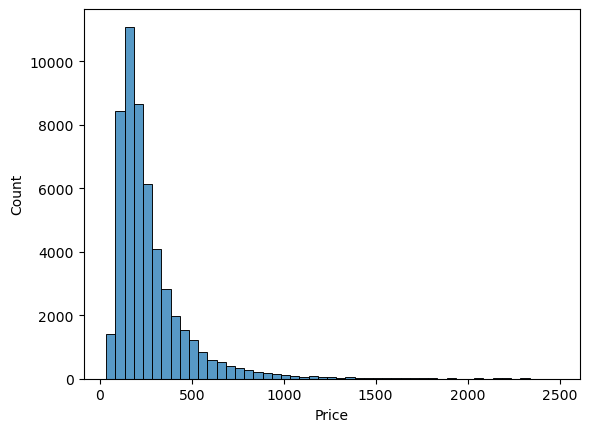

In [ ]:
# plot distribution of price without extreme values
sns.histplot(x='Price', data=df.loc[df['Price']<=2500], binwidth=50)

<Axes: xlabel='Price'>

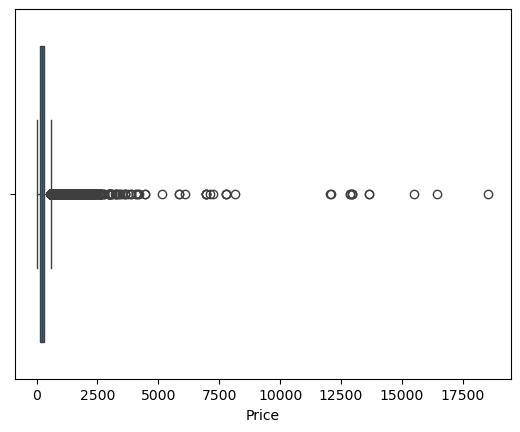

In [ ]:
# plot distribution of price
sns.boxplot(x='Price', data=df)

<Axes: xlabel='Price'>

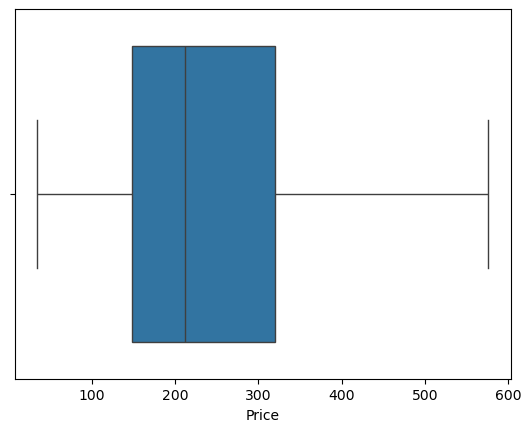

In [ ]:
# plot distribution of price (omit outliers)
sns.boxplot(x='Price', data=df, showfliers=False)

<Axes: xlabel='Price', ylabel='Count'>

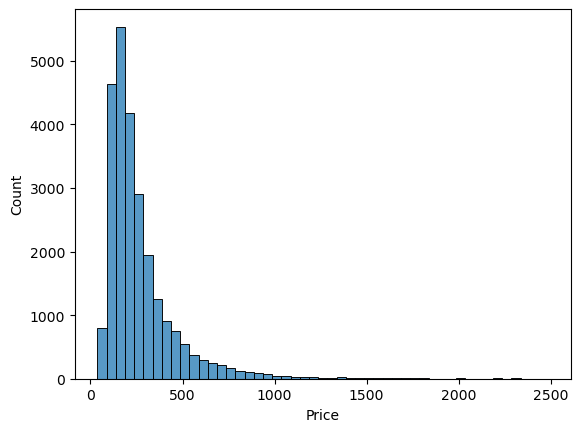

In [ ]:
# plot distribution of price on weekdays without extreme values
sns.histplot(x='Price', data=df.loc[(df['weekday']==True) & (df['Price']<=2500)], binwidth=50)

<Axes: xlabel='Price', ylabel='Count'>

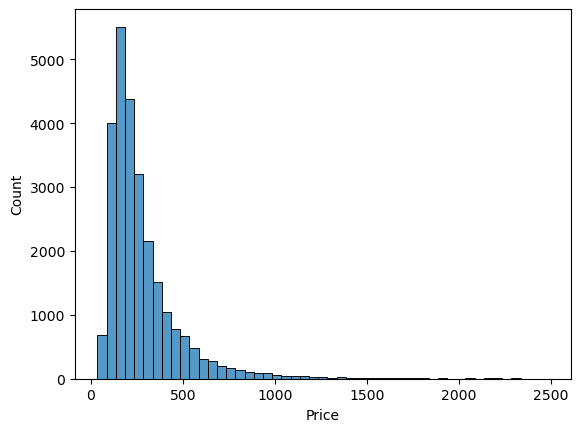

In [ ]:
# plot distribution of price on weekends without extreme values
sns.histplot(x='Price', data=df.loc[(df['weekday']==False) & (df['Price']<=2500)], binwidth=50)

<Axes: xlabel='Price'>

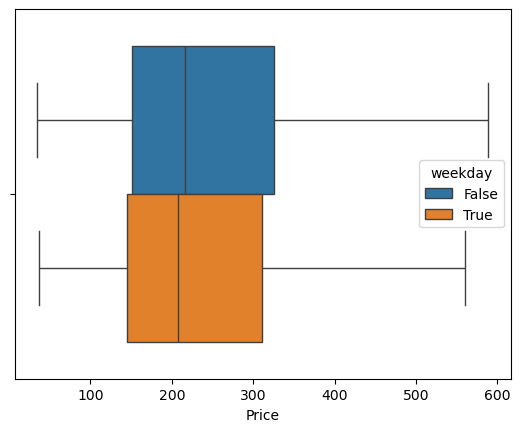

In [ ]:
# compare distribution of price on weekdays and weekends (omit outliers)
sns.boxplot(x='Price', hue='weekday', data=df, showfliers=False)

Both overall, for weekdays and for weekends, the distribution of price is right-skewed. We could log-transform it.

<Axes: xlabel='Price', ylabel='Count'>

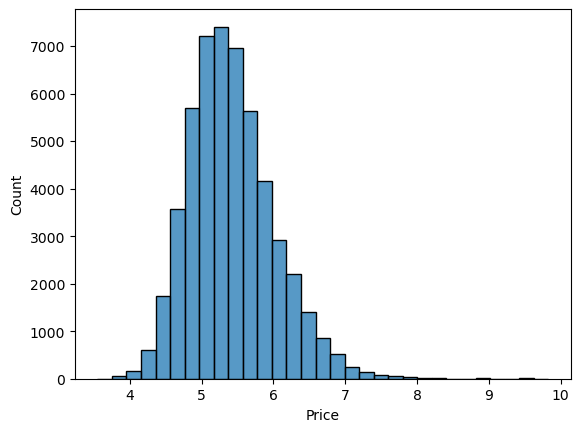

In [ ]:
# plot log-transformed distribution of price
sns.histplot(x=np.log(df['Price']), data=df, binwidth=0.2)

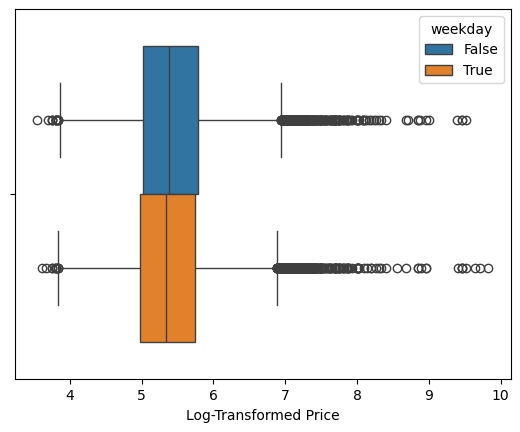

In [ ]:
# compare log-transformed price on weekday vs. weekend
sns.boxplot(x=np.log(df['Price']), hue='weekday', data=df)
plt.xlabel('Log-Transformed Price')
plt.show()

## 3.8. Plot the distribution of guest_satisfaction_overall ratings. 

see question 5

## 3.9. Examine the distribution of cleanliness_rating.

see question 5

# 4. Questions for testing

I will follow these steps for testing (especially for t-tests):

1. Formulate hypotheses (null & alternative)
2. Assumptions (t-test): 
    - normal distribution: check histogram and transform the data if needed
    - equal variance check histogram and do an f-test, use Welch's t-test if unequal
    - (continuous dependent variable)
    - (random samples)
3. Boxplot
4. conduct t-test

## 4.1. Is there a difference in price between two cities? 
Choose at least three pairs of cities during weekdays.

1. Null hypothesis: There is no difference in mean price between london and athens, berlin and barcelona, amsterdam and rome.
Alternative hypothesis: There is a difference.

In [ ]:
# get city names
df['city'].unique()

array(['amsterdam', 'athens', 'berlin', 'barcelona', 'budapest', 'lisbon',
       'london', 'paris', 'rome', 'vienna'], dtype=object)

In [ ]:
# get city prices 
city_prices = {city: df.loc[df['city'] == city, 'Price'] for city in df['city'].unique()}

# choose cities to compare
cities = ['london', 'athens', 'berlin', 'barcelona', 'amsterdam', 'rome']

2. Assumptions:
    - normal distribution (check hist, use log!)
    - equal variance (check hist, f-test)


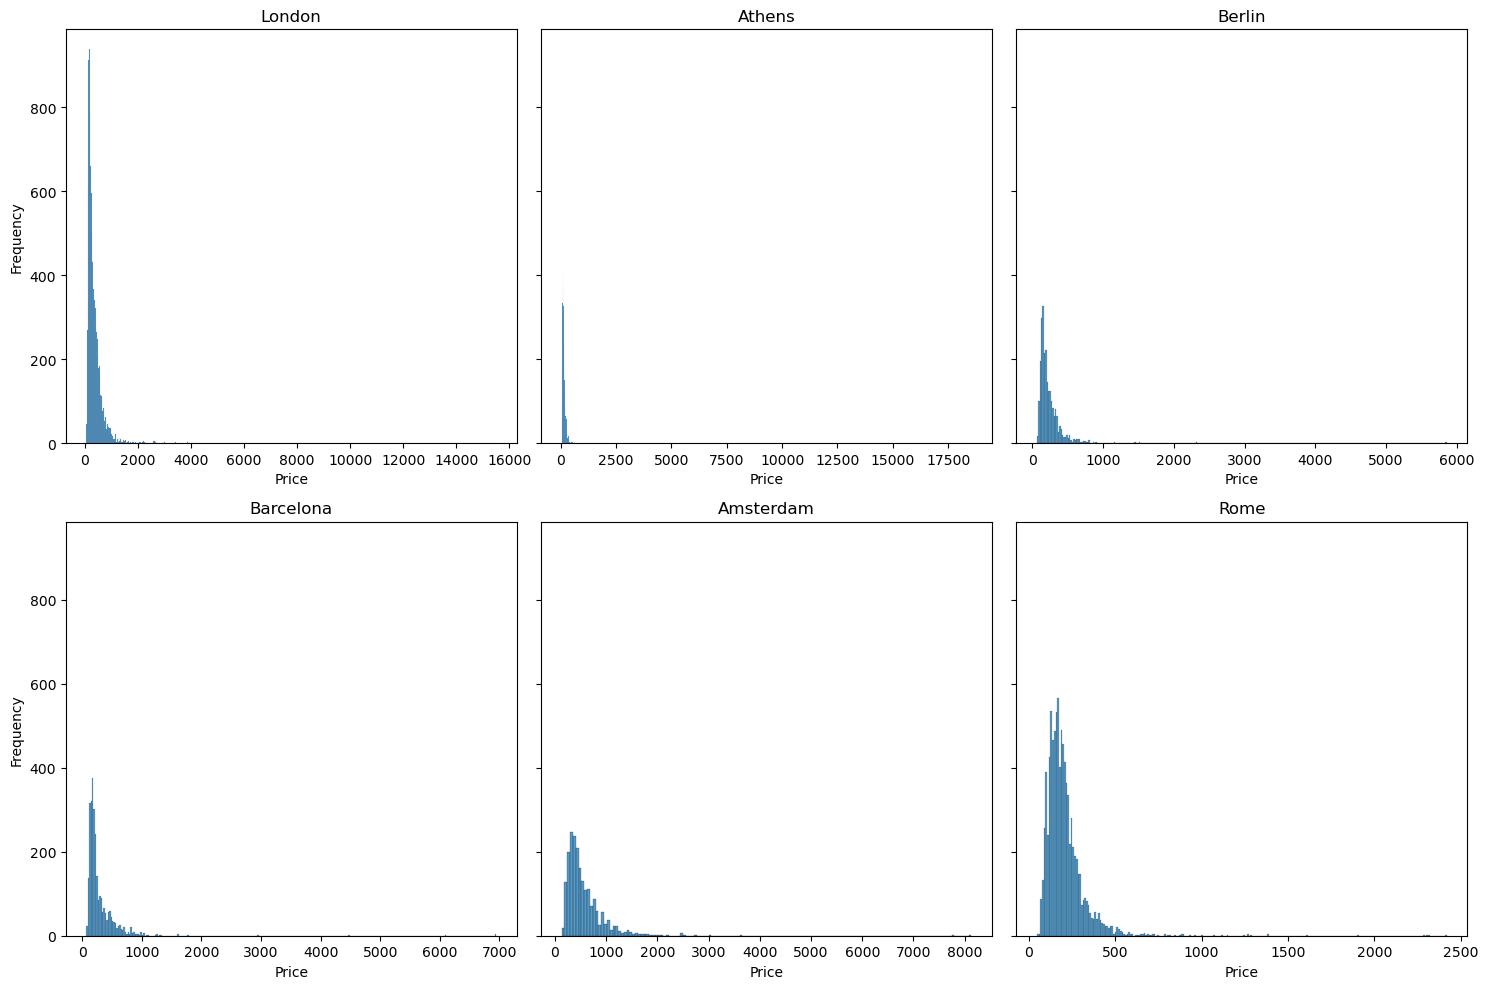

In [ ]:
# plot distributions of city prices
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)  # 2 rows, 3 columns layout

for ax, city in zip(axes.flatten(), cities):
    sns.histplot(city_prices[city], ax = ax)
    ax.set_title(city.capitalize())
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Right-skewed, so we need to log-transform!

In [ ]:
# log-transform city prices
city_prices = {city: np.log(prices + 1) for city, prices in city_prices.items()}

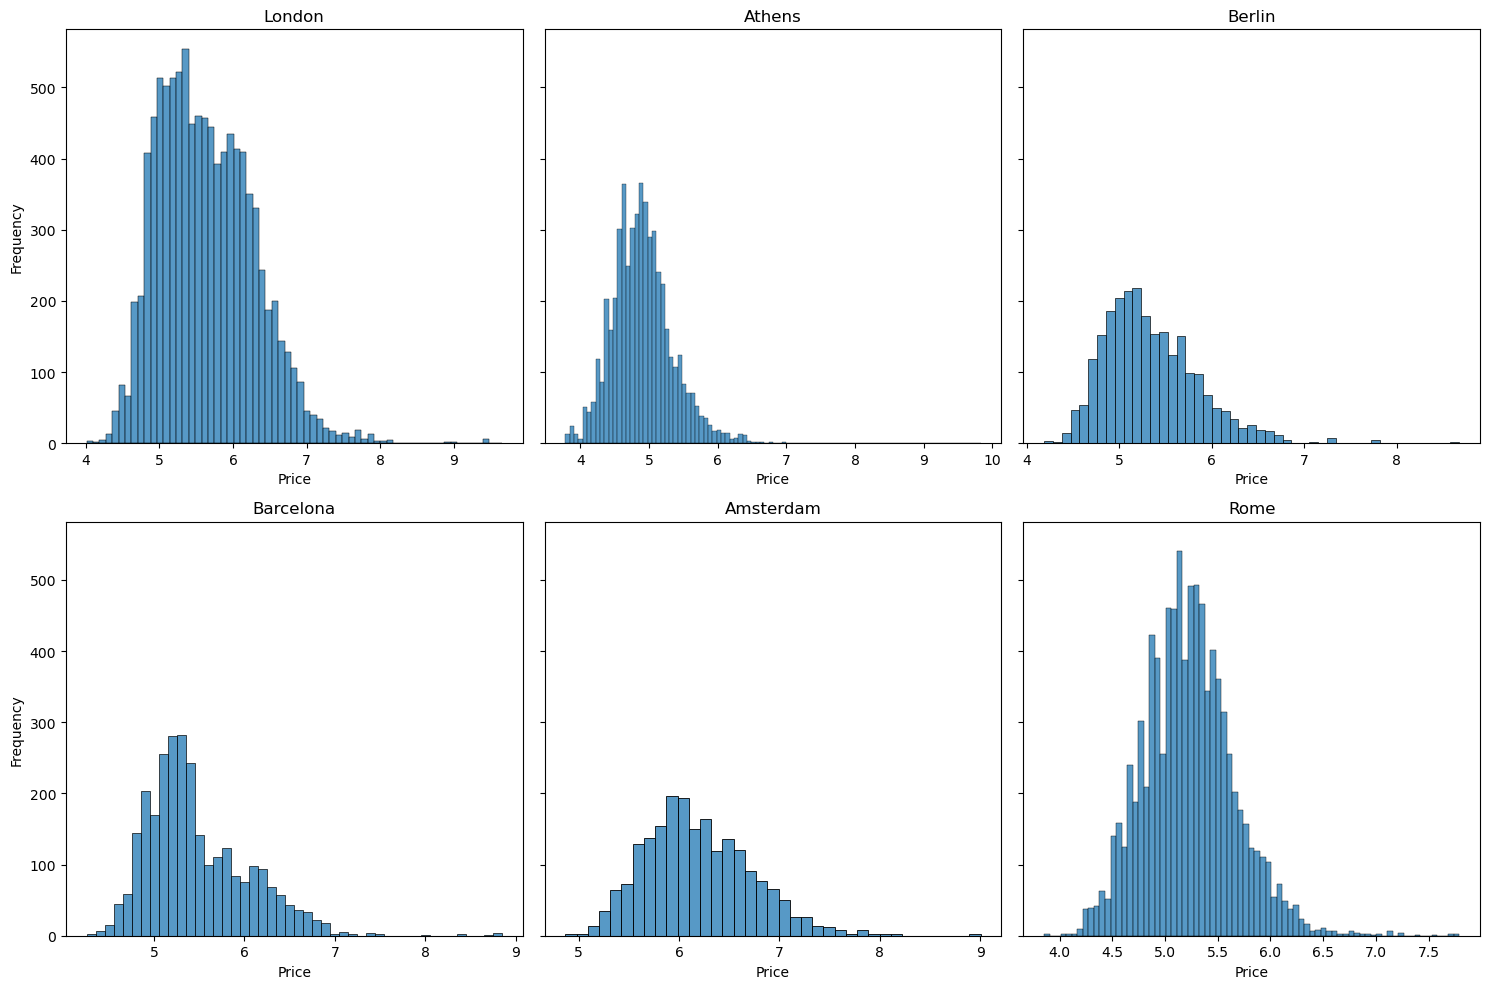

In [ ]:
# Plot distributions of log-transformed city prices
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)  # 2 rows, 3 columns layout

for ax, city in zip(axes.flatten(), cities):
    sns.histplot(city_prices[city], ax = ax)
    ax.set_title(city.capitalize())
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# check for equal variances with f-test
lev = stats.levene(city_prices['london'], city_prices['athens'])
print(lev.pvalue)
lev = stats.levene(city_prices['berlin'], city_prices['barcelona'])
print(lev.pvalue)
lev = stats.levene(city_prices['amsterdam'], city_prices['rome'])
print(lev.pvalue)

5.693247246026474e-196
4.7141440735436036e-05
3.331454414152585e-38


No equal variances, so we need to use Welch's t-test.

3. Boxplot


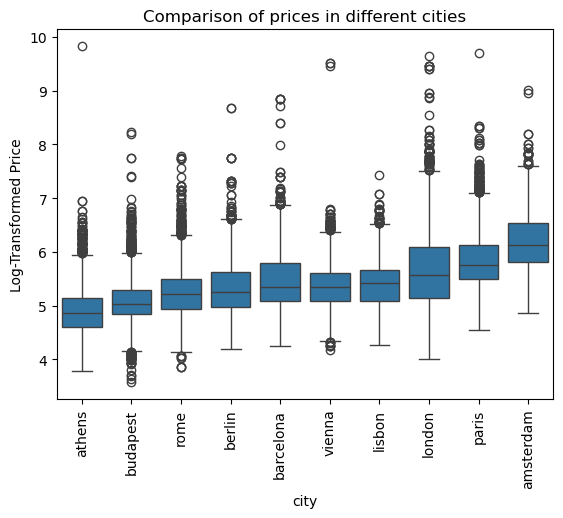

In [ ]:
# compare city prices visually
sns.boxplot(x='city', y=np.log(df['Price'] + 1), data=df,
            order=df.groupby('city')['Price'].median().sort_values().index)
plt.ylabel('Log-Transformed Price')
plt.title('Comparison of prices in different cities')
plt.xticks(rotation=90)
plt.show()

4. do t-test


In [ ]:
# conduct t-tests of city pairs
t = stats.ttest_ind(a=city_prices['london'], b=city_prices['athens'], equal_var=False)
print(t)
t = stats.ttest_ind(a=city_prices['berlin'], b=city_prices['barcelona'], equal_var=False)
print(t)
t = stats.ttest_ind(a=city_prices['amsterdam'], b=city_prices['rome'], equal_var=False)
print(t)

TtestResult(statistic=np.float64(83.64484545677648), pvalue=np.float64(0.0), df=np.float64(14297.07171967128))
TtestResult(statistic=np.float64(-9.033503793335052), pvalue=np.float64(2.284468929183449e-19), df=np.float64(5313.160309964853))
TtestResult(statistic=np.float64(77.17325109422845), pvalue=np.float64(0.0), df=np.float64(2742.6162645332092))


The mean prices of checked pairs of cities are statistically different.

## 4.2. Does the price tend to be higher on weekends?

1. Null hypothesis: There is no difference in mean price between weekdays and weekends.  
Alternative hypothesis: Mean price is higher on weekends than weekdays.


In [ ]:
# get weekday and weekend prices and log-transform them
weekday_prices = df.loc[df['weekday']==True, 'Price']
weekend_prices = df.loc[df['weekday']==False, 'Price']
weekday_prices = np.log(weekday_prices)
weekend_prices = np.log(weekend_prices)

2. Assumptions: 
    - normal distribution (check hist, use log!)
    - equal variance (check hist, f-test)


<Axes: xlabel='Price', ylabel='Count'>

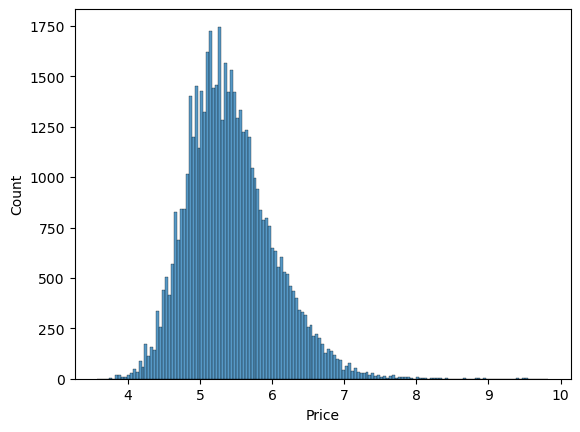

In [ ]:
# plot distribution of log-transformed weekday prices
sns.histplot(x=np.log(df['Price'] + 1), data=df.loc[df['weekday']==True])

<Axes: xlabel='Price', ylabel='Count'>

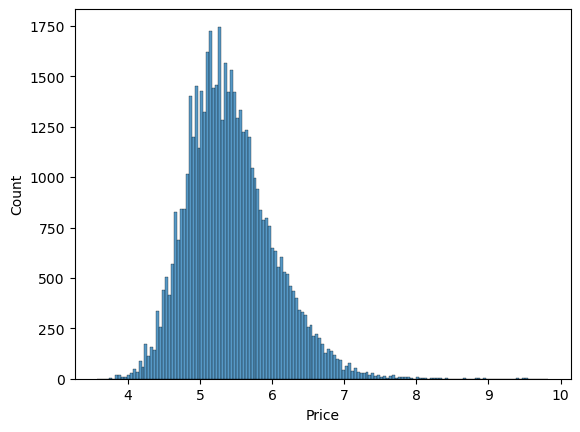

In [ ]:
# plot distribution of log-transformed weekend prices
sns.histplot(x=np.log(df['Price'] + 1), data=df.loc[df['weekday']==False])

In [ ]:
# check for euqal variances using f-test
lev = stats.levene(weekend_prices, weekday_prices)
lev.pvalue

np.float64(0.31059288545149505)

Equal variance :) We can use student's t-test.

3. Boxplot

<Axes: xlabel='weekday', ylabel='Price'>

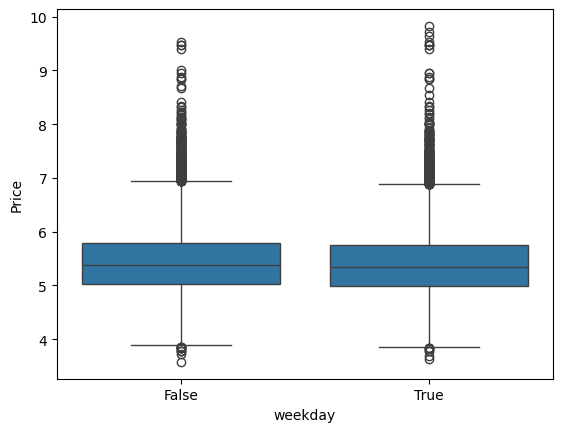

In [148]:
# compare log-transformed weekday and weekend prices visually
sns.boxplot(x='weekday', y=np.log(df['Price'] + 1), data=df)

4. do t-test

In [ ]:
# run one tailed student's t-test
t = stats.ttest_ind(weekend_prices, weekday_prices, equal_var=True, alternative='greater')
t

TtestResult(statistic=np.float64(7.249335953120726), pvalue=np.float64(2.123300992247551e-13), df=np.float64(51705.0))

In [ ]:
# run two tailed student's t-test
t = stats.ttest_ind(weekend_prices, weekday_prices, equal_var=True, alternative='two-sided')
t

TtestResult(statistic=np.float64(7.249335953120726), pvalue=np.float64(4.246601984495102e-13), df=np.float64(51705.0))

Significant difference in mean price between weekend and weekday! P-value halves when doing one-tailed t-test.

## 4.3. Are listings of superhosts more expensive than those of normal hosts?

1. Null hypothesis: There is no difference in mean price between superhosts and normal hosts.  
Alternative hypothesis: Mean price is higher for listings of superhosts than listings of normal hosts.


In [150]:
# get superhost and normal host prices and log-transform them
superhost_prices = df.loc[df['host_is_superhost']==True, 'Price']
host_prices = df.loc[df['host_is_superhost']==False, 'Price']
superhost_prices = np.log(superhost_prices)
host_prices = np.log(host_prices)

2. Assumptions: 
    - normal distribution (check hist, use log!)
    - equal variance (check hist, f-test)
    - (continuous)
    - (random samples)


<Axes: xlabel='Price', ylabel='Count'>

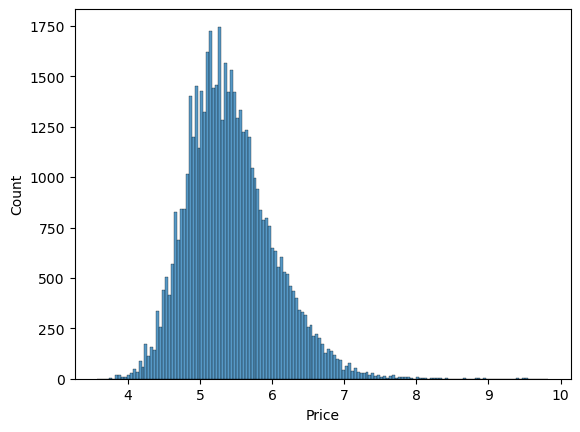

In [151]:
# plot distribution of log-transformed prices for superhosts
sns.histplot(x=np.log(df['Price'] + 1), data=df.loc[df['host_is_superhost']==True])

<Axes: xlabel='Price', ylabel='Count'>

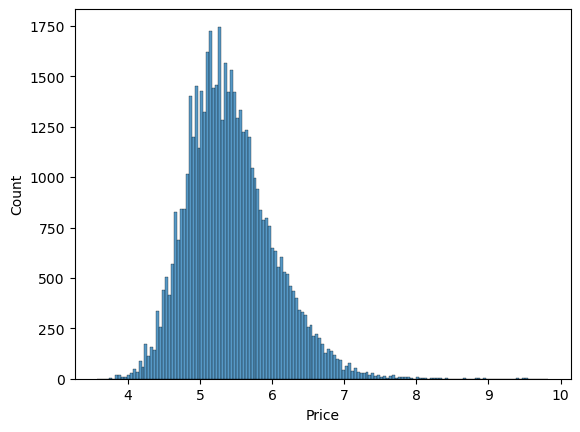

In [ ]:
# plot distribution of log-transformed prices for normal hosts
sns.histplot(x=np.log(df['Price'] + 1), data=df.loc[df['host_is_superhost']==False])

In [ ]:
# check for equal variances using f-test
lev = stats.levene(superhost_prices, host_prices)
print(lev.pvalue)

3.731600751726672e-45


No equal variance!

3. Boxplot

<Axes: xlabel='host_is_superhost', ylabel='Price'>

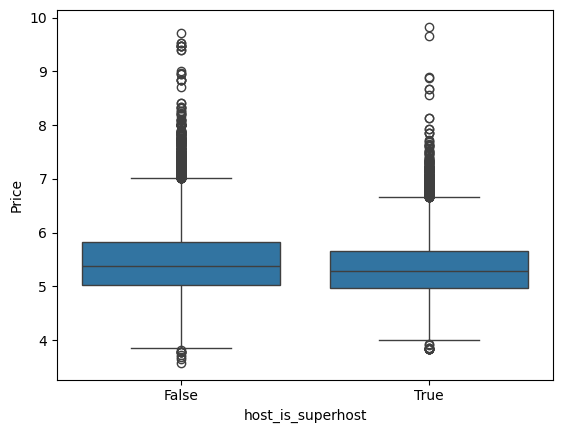

In [ ]:
# compare log-transformed superhost and normal host prices visually
sns.boxplot(x='host_is_superhost', y=np.log(df['Price'] + 1), data=df)

4. do t-test

In [ ]:
# run one-tailed t-test 
t = stats.ttest_ind(superhost_prices, host_prices, equal_var=False, alternative='greater')
t

TtestResult(statistic=np.float64(-16.818384752189413), pvalue=np.float64(1.0), df=np.float64(24994.45995668466))

In [ ]:
# run two-tailed t-test
t = stats.ttest_ind(superhost_prices, host_prices, equal_var=False, alternative='two-sided')
t

TtestResult(statistic=np.float64(-16.818384752189413), pvalue=np.float64(3.982674890599372e-63), df=np.float64(24994.45995668466))

Hä?

## 4.4. Are superhosts closer to the city center and metro station than normal hosts?

1. Null hypothesis: There is no difference in mean distance to city center and metro station between superhosts and normal hosts.  
Alternative hypothesis: Mean distance to city center and metro is smaller for listings of superhosts than listings of normal hosts.

In [ ]:
# get column names
df.columns

Index(['index', 'Price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'sheet_name', 'city', 'weekday',
       'country', 'room'],
      dtype='object')

In [ ]:
# select distances for hosts and superhosts and log-transform them
superhost_dist = df.loc[df['host_is_superhost']==True, 'dist']
host_dist = df.loc[df['host_is_superhost']==False, 'dist']
superhost_dist = np.log(superhost_dist)
host_dist = np.log(host_dist)

In [ ]:
# select metro distances for hosts and superhosts and log-transform them
superhost_metro_dist = df.loc[df['host_is_superhost']==True, 'metro_dist']
host_metro_dist = df.loc[df['host_is_superhost']==False, 'metro_dist']
superhost_metro_dist = np.log(superhost_metro_dist)
host_metro_dist = np.log(host_metro_dist)

2. Assumptions: 
    - normal distribution (check hist, use log!)
    - equal variance (check hist, f-test)


<Axes: xlabel='dist', ylabel='Count'>

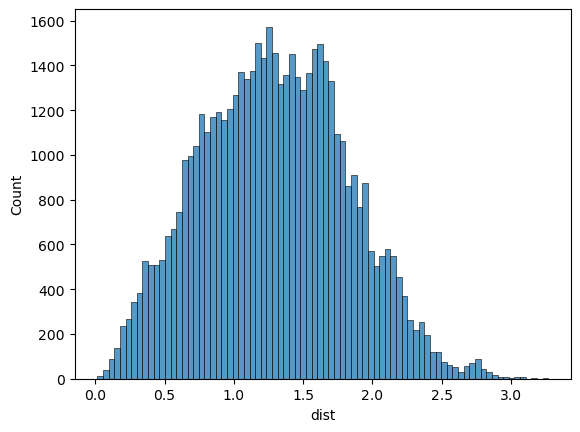

In [ ]:
# plot distribution of log-transformed distance of superhosts
sns.histplot(x=np.log(df['dist'] + 1), data=df.loc[df['host_is_superhost']==True])

<Axes: xlabel='dist', ylabel='Count'>

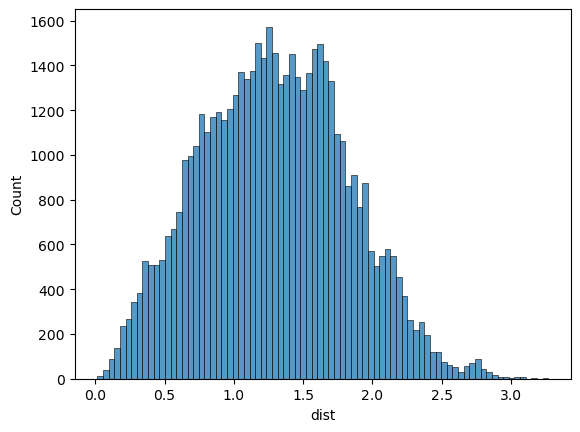

In [152]:
# plot distribution of log-transformed distance of normal hosts
sns.histplot(x=np.log(df['dist'] + 1), data=df.loc[df['host_is_superhost']==False])

In [153]:
# check for equal variance with f-test
lev = stats.levene(superhost_dist, host_dist)
print(lev.pvalue)

0.3428134573097681


Equal variance!

3. Boxplot

<Axes: xlabel='host_is_superhost', ylabel='dist'>

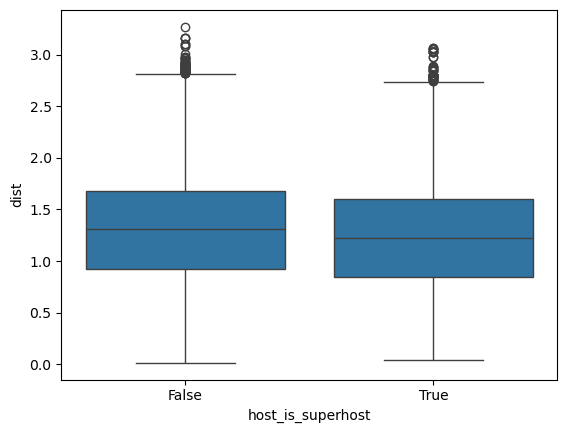

In [154]:
# compare log-transformed distances of superhosts and hosts visually
sns.boxplot(x='host_is_superhost', y=np.log(df['dist'] + 1), data=df)

4. do test

In [156]:
# run t-test
t = stats.ttest_ind(superhost_dist, host_dist, equal_var=False, alternative='less')
t

TtestResult(statistic=np.float64(-13.541319597870013), pvalue=np.float64(6.455828611115834e-42), df=np.float64(22835.06855525787))

In [158]:
# run t-test
t = stats.ttest_ind(superhost_dist, host_dist, equal_var=False, alternative='two-sided')
t

TtestResult(statistic=np.float64(-13.541319597870013), pvalue=np.float64(1.2911657222231667e-41), df=np.float64(22835.06855525787))

Superhosts are significantly closer to the city center than normal hosts.

## 4.5. Are superhosts cleaner than normal hosts?

1. Null hypothesis: There is no difference in mean cleanliness rating between superhosts and normal hosts.  
Alternative hypothesis: Mean cleanliness rating is higher for listings of superhosts than listings of normal hosts.

In [ ]:
# get column names
df.columns

Index(['index', 'Price', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'sheet_name', 'city', 'weekday',
       'country', 'room'],
      dtype='object')

In [160]:
# select cleanliness values for superhost and hosts and log-transform them
superhost_clean = df.loc[df['host_is_superhost']==True, 'cleanliness_rating']
host_clean = df.loc[df['host_is_superhost']==False, 'cleanliness_rating']
superhost_clean = np.log(11-superhost_clean)
host_clean = np.log(11-host_clean)

2. Assumptions: 
    - normal distribution (check hist, use log!)
    - equal variance (check hist, f-test)

<Axes: xlabel='cleanliness_rating', ylabel='Count'>

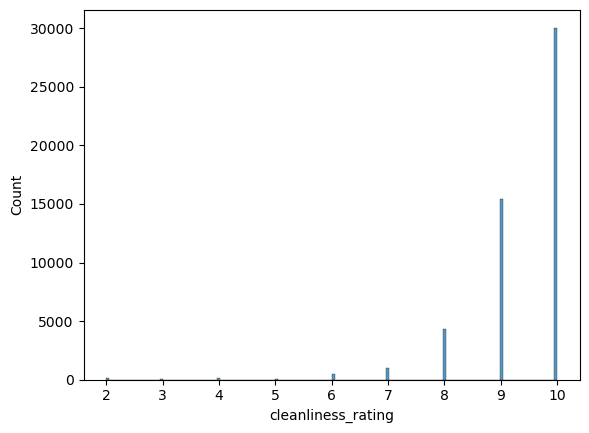

In [161]:
# plot distribution of cleanliness rating for superhosts
sns.histplot(x=df['cleanliness_rating'], data=df.loc[df['host_is_superhost']==True])


<Axes: xlabel='cleanliness_rating', ylabel='Count'>

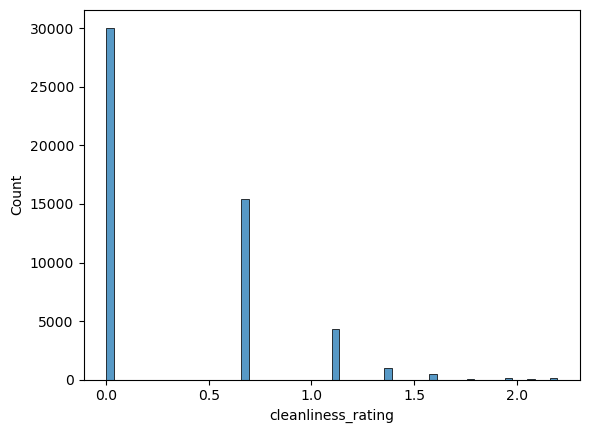

In [163]:
# plot distribution of log-transformed cleanliness rating
sns.histplot(x=np.log(11-df['cleanliness_rating']), data=df.loc[df['host_is_superhost']==True])

Even with transformations, cleanliness rating is not normally distributed. So we cannot meat the assumptions of a t-test and should not conduct one.

3. Boxplot

<Axes: xlabel='host_is_superhost', ylabel='cleanliness_rating'>

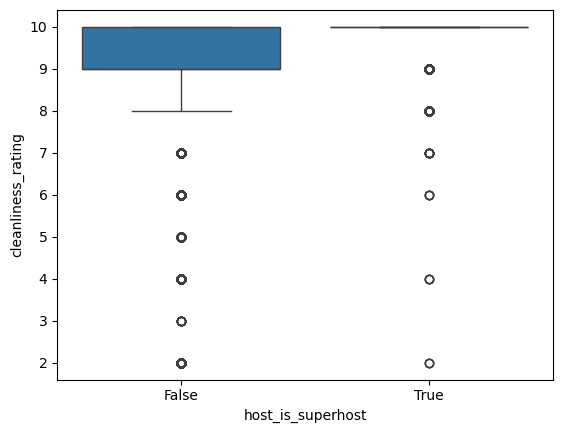

In [164]:
# compare cleanliness ratings visually
sns.boxplot(x='host_is_superhost', y='cleanliness_rating', data=df)

## 4.6. Is there a pattern between room types and superhost status?

1. Null hypothesis: There is no pattern between room types and superhost status. Alternative hypothesis: There is a pattern.

In [ ]:
# make frequency table
crosstab = pd.crosstab(df['room_type'], df['host_is_superhost'])
crosstab

host_is_superhost,False,True
room_type,,
Entire home/apt,23704,8944
Private room,14446,4247
Shared room,325,41


In [165]:
# run chi-square test
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=np.float64(176.54066965543066), pvalue=np.float64(4.620411632426391e-39), dof=2, expected_freq=array([[24293.26396813,  8354.73603187],
       [13909.39669677,  4783.60330323],
       [  272.3393351 ,    93.6606649 ]]))

There is a significant relation between room types and superhost status.

## 4.7. Is it more expensive to rent an entire home/apt than a private room? Does that depend on the city?

1. Null hypothesis: There is no difference in mean price between entire homes/apts and private rooms.
Alternative hypothesis: Mean price is higher for entire homes/apts than for private rooms.

In [ ]:
# get room types
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# select home vs room prices and log-transform
home_price = df.loc[df['room_type']=='Entire home/apt', 'Price']
room_price = df.loc[df['room_type']=='Private room', 'Price']
home_price = np.log(home_price)
room_price = np.log(room_price)

2. Assumptions: 
    - normal distribution (check hist, use log!)
    - equal variance (check hist, f-test)


<Axes: xlabel='Price', ylabel='Count'>

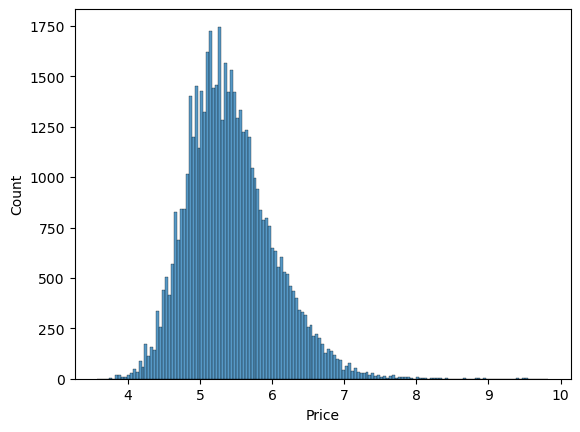

In [ ]:
# plot distribution of log-transformed home prices
sns.histplot(x=np.log(df['Price'] + 1), data=df.loc[df['room_type']=='Entire home/apt'])

<Axes: xlabel='Price', ylabel='Count'>

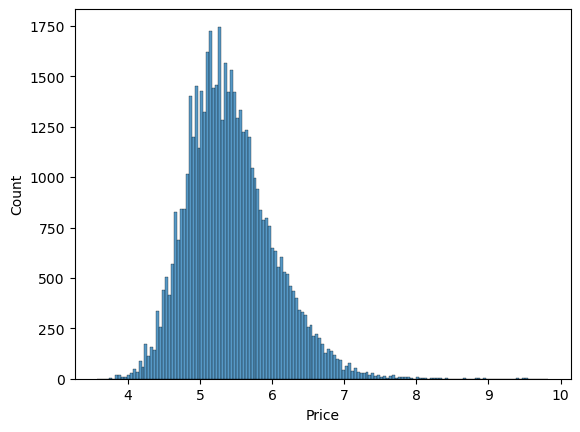

In [ ]:
# plot distribution of log-transformed room prices
sns.histplot(x=np.log(df['Price'] + 1), data=df.loc[df['room_type']=='Private room'])

In [166]:
# check for equal variances with f-test
lev = stats.levene(home_price, room_price)
print(lev.pvalue)

8.932129648669885e-194


No equal variance!

3. Boxplot

<Axes: xlabel='room_type', ylabel='Price'>

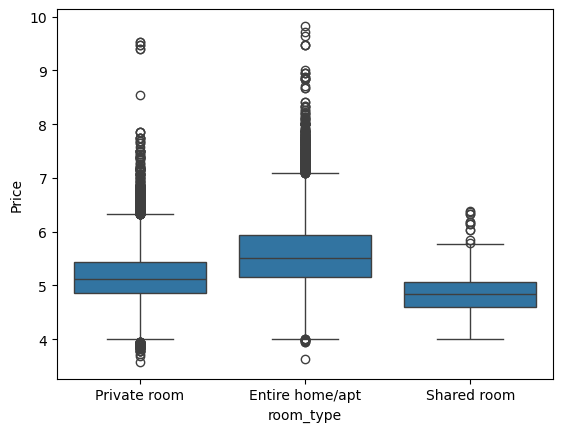

In [ ]:
# compare prices between rooms vs homes visually
sns.boxplot(x='room_type', y=np.log(df['Price'] + 1), data=df)

4. do test

In [167]:
# run one-tailed t-test
t = stats.ttest_ind(home_price, room_price, equal_var=False, alternative='greater')
t

TtestResult(statistic=np.float64(82.00040690594138), pvalue=np.float64(0.0), df=np.float64(45559.33387150684))

In [168]:
# run two-tailed t-test
t = stats.ttest_ind(home_price, room_price, equal_var=False, alternative='two-sided')
t

TtestResult(statistic=np.float64(82.00040690594138), pvalue=np.float64(0.0), df=np.float64(45559.33387150684))

It is significantly more expensive to rent an entire home/apt instead of a private room.

## 4.8. Create a map for each city where the top 10 most expensive Airbnbs are shown and the top 10 cheapest Airbnbs are shown.

In [ ]:
# select 10 most expensive and 10 cheapest listings
most_expensive = df.nlargest(n=10, columns='Price')
cheapest = df.nsmallest(n=10, columns='Price')

# add a column to specify the price category
most_expensive['Price category'] = 'Expensive'
cheapest['Price category'] = 'Cheap'

# concatenate the two dfs into one 
extremes = pd.concat([most_expensive, cheapest])
extremes


,index,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,rest_index,rest_index_norm,lng,lat,sheet_name,city,weekday,country,room,Price category
3590,1510,18545.450285,Entire home/apt,False,False,2,True,0,1,10,...,275.573716,20.691752,23.73200,37.98600,athens_weekdays,athens,True,Greece,None,Expensive
34803,2348,16445.614689,Entire home/apt,False,False,2,False,0,0,9,...,545.826245,32.072497,2.29772,48.83669,paris_weekdays,paris,True,France,None,Expensive
24348,1886,15499.894165,Entire home/apt,False,False,3,True,0,1,10,...,2358.358493,42.228377,-0.13038,51.50995,london_weekdays,london,True,United Kingdom,None,Expensive
48380,210,13664.305916,Private room,False,True,2,False,0,0,9,...,201.545043,4.818080,16.34356,48.20751,vienna_weekdays,vienna,True,Austria,private,Expensive
50787,879,13656.358834,Private room,False,True,2,False,0,0,9,...,201.546533,4.871302,16.34356,48.20751,vienna_weekends,vienna,False,Austria,private,Expensive
48215,45,12942.991375,Entire home/apt,False,False,4,False,0,1,7,...,196.019793,4.685995,16.38614,48.21911,vienna_weekdays,vienna,True,Austria,None,Expensive
30626,3550,12937.275101,Entire home/apt,False,False,6,False,0,0,10,...,781.529958,13.988024,-0.14658,51.53190,london_weekends,london,False,United Kingdom,None,Expensive
31635,4559,12929.513864,Private room,False,True,2,False,0,0,7,...,444.050900,7.947737,-0.04987,51.49397,london_weekends,london,False,United Kingdom,private,Expensive
25629,3167,12886.239093,Entire home/apt,False,False,6,False,0,0,10,...,781.526400,13.993882,-0.14658,51.53190,london_weekdays,london,True,United Kingdom,None,Expensive
25945,3483,12886.239093,Private room,False,True,2,False,0,0,7,...,444.051763,7.951117,-0.04987,51.49397,london_weekdays,london,True,United Kingdom,private,Expensive


In [ ]:
# plot the listings with extreme prices on a map (cheap in blue and expensive in red)
fig = px.scatter_mapbox(extremes, 
                        lat='lat', 
                        lon='lng', 
                        hover_name='city',
                        color='Price category',
                        color_discrete_map={"Expensive": "red", "Cheap": "blue"}, 
                        zoom=4, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Bonus questions

1. Airbnb plays a big role in the phenomenon known as gentrification. Based on the data, what can you tell about this phenomenon, could you see a pattern? Is it different in each city? 

As a tip, consider 1) how much would it cost to rent each listing for a month, as if paying the Airbnb for a long-term stay (subselect only those listings whose price is below 300)

In [ ]:
# calculate mean monthly price for an listing
df_cheaper = df.loc[df['Price']<300]
monthly_price = df_cheaper['Price'].mean() * 30
monthly_price

np.float64(5372.541817901302)

 and 2) how many listings belong to owners with more than property and that are closer to the city center. 

In [ ]:
df['dist'].describe()

count    51707.000000
mean         3.191285
std          2.393803
min          0.015045
25%          1.453142
50%          2.613538
75%          4.263077
max         25.284557
Name: dist, dtype: float64

In [170]:
# show how many listings belong to superhosts or are in the closer to the city center half of values
df_gentri = df.loc[(df['host_is_superhost']==True) | (df['dist']<df['dist'].median())]
print(df_gentri.shape[0])
print(df.shape[0])
print(df_gentri.shape[0]/df.shape[0])

31829
51707
0.6155646237453343


Not that many listings belong to owners with more than one property AND are closer to the city center, but many are either close OR belong to superhosts.

2. Which information is missing in order to conduct a better analysis and to understand the gentrification phenomenon?


Maybe information about rent prices, income of people living there, and time series data.